<a href="https://colab.research.google.com/github/Shiwaninayak/KNN-and-Naive-Bayes-assessment-IITD-FSM/blob/main/knn%20and%20naive%20bayes%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#KNN algorithm implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/content/train.csv')
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [64]:
df.shape

(891, 12)

In [67]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
df = df.drop('Fare', axis=1,)
df = df.drop('Cabin', axis=1,)
df['Family'] = df['SibSp'] + df['Parch'] + 1
df = df.drop('SibSp', axis=1,)
df = df.drop('Parch', axis=1,)

In [69]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass     Sex   Age Embarked  Family
0              1         0       3    male  22.0        S       2
1              2         1       1  female  38.0        C       2
2              3         1       3  female  26.0        S       1
3              4         1       1  female  35.0        S       2
4              5         0       3    male  35.0        S       1
..           ...       ...     ...     ...   ...      ...     ...
886          887         0       2    male  27.0        S       1
887          888         1       1  female  19.0        S       1
888          889         0       3  female   NaN        S       4
889          890         1       1    male  26.0        C       1
890          891         0       3    male  32.0        Q       1

[891 rows x 7 columns]>

In [70]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,1.904602
std,257.353842,0.486592,0.836071,13.019697,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


In [71]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
df['Embarked'].isna().sum()

2

In [73]:
print(df["Embarked"].mode())
df["Embarked"] = df["Embarked"].fillna("S")

0    S
Name: Embarked, dtype: object


In [74]:
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [75]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [76]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
df.Sex.replace(['male', 'female'], [1,0], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,1,22.0,1,2
1,2,1,1,0,38.0,2,2
2,3,1,3,0,26.0,1,1
3,4,1,1,0,35.0,1,2
4,5,0,3,1,35.0,1,1


In [79]:
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [80]:
final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 71

 CV accuracy for k=3 is 74

 CV accuracy for k=5 is 73

 CV accuracy for k=7 is 72

 CV accuracy for k=9 is 71

 CV accuracy for k=11 is 69

 CV accuracy for k=13 is 68

 CV accuracy for k=15 is 67

 CV accuracy for k=17 is 67

 CV accuracy for k=19 is 67

 CV accuracy for k=21 is 65

 CV accuracy for k=23 is 64

 CV accuracy for k=25 is 62

 CV accuracy for k=27 is 60

 CV accuracy for k=29 is 60


In [81]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)

1


In [82]:
df_test = pd.read_csv('/content/test.csv')
df_test = df_test.drop('Name', axis=1,)
df_test = df_test.drop('Ticket', axis=1,)
df_test = df_test.drop('Fare', axis=1,)
df_test = df_test.drop('Cabin', axis=1,)
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop('SibSp', axis=1,)
df_test = df_test.drop('Parch', axis=1,)
df_test["Age"] = df_test["Age"].fillna(df["Age"].median())

In [84]:
df_test1 = pd.read_csv('/content/test.csv')
df_test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [85]:
print(df_test["Embarked"].mode())
df_test["Embarked"] = df_test["Embarked"].fillna("S")

0    S
Name: Embarked, dtype: object


In [86]:
df_test.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
df_test.Sex.replace(['male', 'female'], [1,0], inplace=True)
X_test = np.array(df_test.filter(['Pclass','Sex','Embarked','Family','Age'], axis=1))
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_tr, y_tr)
pred = knn.predict(X_test)
print(pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [87]:
df_test['Survived'] = pd.Series(pred, index=df_test.index)
df_test

,PassengerId,Pclass,Sex,Age,Embarked,Family,Survived
0,892,3,1,34.5,3,1,0
1,893,3,0,47.0,1,2,0
2,894,2,1,62.0,3,1,0
3,895,3,1,27.0,1,1,0
4,896,3,0,22.0,1,3,0
...,...,...,...,...,...,...,...
413,1305,3,1,28.0,1,1,0
414,1306,1,0,39.0,2,1,1
415,1307,3,1,38.5,1,1,0
416,1308,3,1,28.0,1,1,0


In [88]:
final_df = df_test.filter(['PassengerId','Survived'], axis=1)
final_df.shape

(418, 2)

In [90]:
#Naive Bayes algorithm implementation
train_raw = pd.read_csv('/content/train.csv')
test_raw = pd.read_csv('/content/test.csv')
test_ids = test_raw['PassengerId'].values
train_raw['train'] = 1
test_raw['train'] = 0
data = train_raw.append(test_raw, sort=False)

In [91]:
data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [92]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

data = data[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
data['Sex'] = data['Sex'].replace(["female", "male"], [0, 1])
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
data['Age'] = pd.qcut(data['Age'], 10, labels=False)

In [93]:
train = data.query('train == 1')
test = data.query('train == 0')

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values
train.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,train
0,2.0,1.0,7.2500,0,3,1,1,0.0,1
1,7.0,2.0,71.2833,0,1,0,1,1.0,1
2,4.0,1.0,7.9250,0,3,0,0,1.0,1
3,6.0,1.0,53.1000,0,1,0,1,1.0,1
4,6.0,1.0,8.0500,0,3,1,0,0.0,1


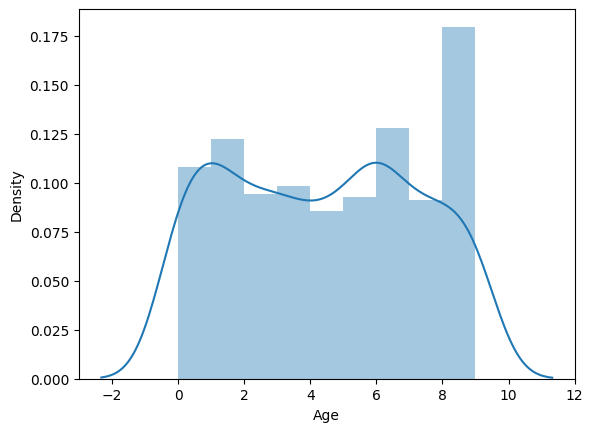

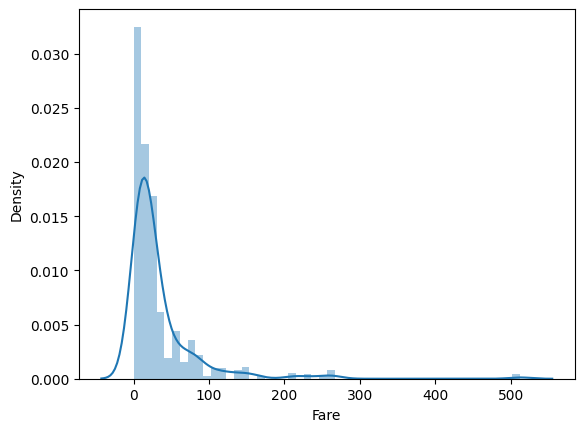

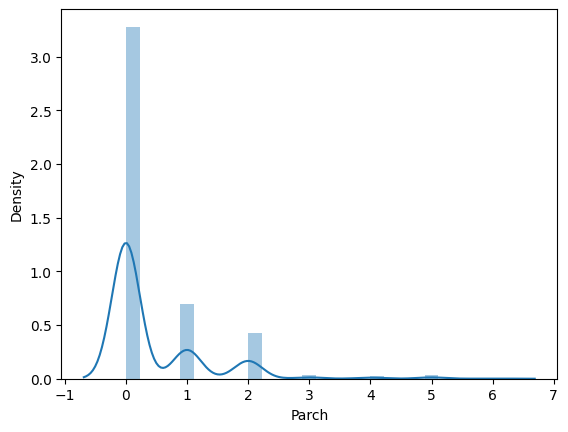

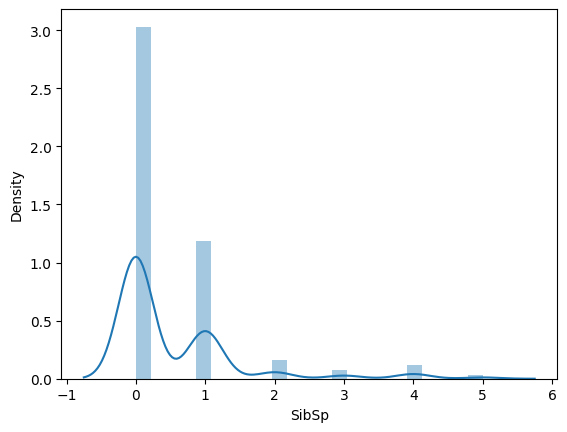

In [94]:
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_numeric_features:
    sns.distplot(train[feature])
    plt.show()

In [95]:
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)
X_train.head()

,Age,Embarked,Fare,Parch,Sex,SibSp
830,1.0,2.0,14.4542,0,0,1
566,1.0,1.0,7.8958,0,1,0
149,7.0,1.0,13.0000,0,1,0
106,2.0,1.0,7.6500,0,0,0
290,4.0,1.0,78.8500,0,0,0


In [96]:
X_train1, X_train2, Y_train1, Y_train2 = train_test_split(X_train, Y_train, test_size=0.3, random_state=12)

In [97]:
classifier = GaussianNB()
classifier.fit(X_train2, Y_train2)

GaussianNB()

In [99]:
classifier.fit(X_train2, Y_train2)

GaussianNB()

In [103]:
print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.58
Survive = 1: 0.42


In [104]:
print('Mean of each feature per class')
print('               Age         Embarked   Fare         Parch       Sex         SibSp')
print('Survive = 0: %s' % classifier.theta_[0])
print('Survive = 1: %s' % classifier.theta_[1])

Mean of each feature per class
               Age         Embarked   Fare         Parch       Sex         SibSp
Survive = 0: [ 4.27272727  1.25252525 21.22474444  0.25252525  0.88888889  0.45454545]
Survive = 1: [ 4.61111111  1.40277778 52.81666667  0.45833333  0.38888889  0.43055556]


In [106]:
test.fillna(test.mean(), inplace=True)
test_predictions = classifier.predict(test)
submission = pd.DataFrame({'PassengerId': test_ids})
submission['Survived'] = test_predictions.astype('int')
submission.to_csv('submission.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
